# Homework Assignment 1 - (Question 5) - Solutions

## <u>Case Study</u>: 2016 U.S. Presidential Primary County Clusters


### Dataset Background

The dataset that we will be examining is comprised of U.S. counties that cast more than a total of 200 votes towards all candidates in the 2016 presidential *Republican primary* elections.

**You don't need to know anything about U.S. politics to complete this exericse other than the information given below!**

While there were more than 5 Republican candidates in the 2016 presidential primary elections, this dataset is comprised of the 5 candidates who had the highest total percentages of votes of all of these counties:

* **Republicans**:
    - Ted Cruz
    - John Kasich
    - Donald Trump
    - Ben Carson
    - Marco Rubio

Each row in this dataframe shows the percentage of county votes that went to each of these 5 candidates.

*Analysis Choice Note: There were only two main viable contenders in the Democrat primaries in 2016, which would translate to a dataset with just two variables. Whereas the Republican primary in 2016 had more than two main contenders, which would translate to a dataset with more than two variables. Thus, performing a cluster analysis on this Republican dataset is going to be more useful.*
 




### Research Questions

In this analysis we would like to answer the following questions about the dataset.
1. Is this dataset clusterable?
2. If so, how many clusters are there in the dataset?
3. Which candidates did the counties in each cluster strongly prefer and not prefer?

<hr>



### Imports


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

### 5.1. Read the csv [0.5 pt]
Read the reduced_2016_primary_data.csv into a dataframe. Call it df.

In [13]:
df = pd.read_csv('reduced_2016_primary_data.csv')

Index(['Vote_Data_Donald_Trump_Percent_of_Votes',
       'Vote_Data_Ted_Cruz_Percent_of_Votes',
       'Vote_Data_John_Kasich_Percent_of_Votes',
       'Vote_Data_Marco_Rubio_Percent_of_Votes',
       'Vote_Data_Ben_Carson_Percent_of_Votes'],
      dtype='object')

### 5.2. Examining the dataframe. [0.5 pt]

Show the first five rows of the dataframe df.

In [ ]:
df.head()

### 5.3. Describing each numerical variable in the dataframe. [1 pt]

Create a histogram for each of the five candidates in the dataset.

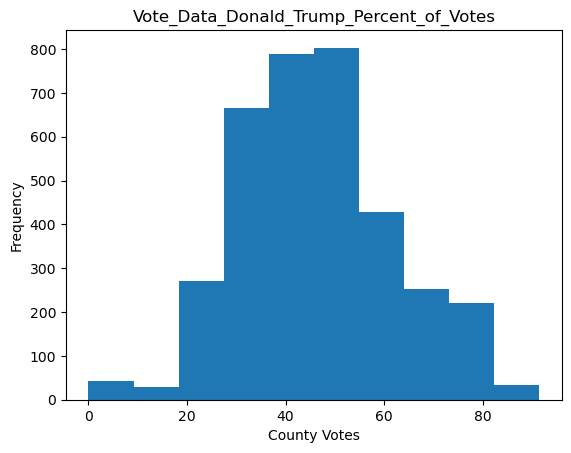

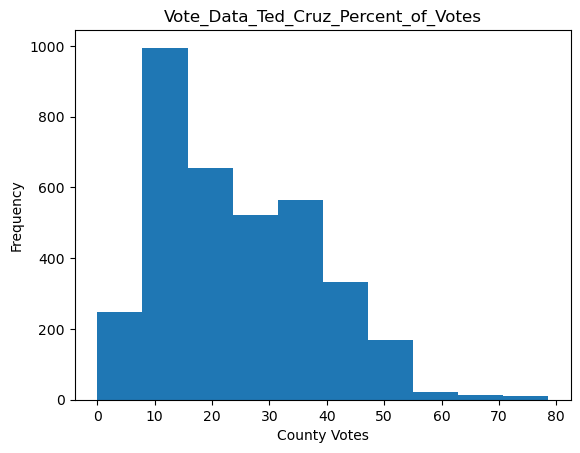

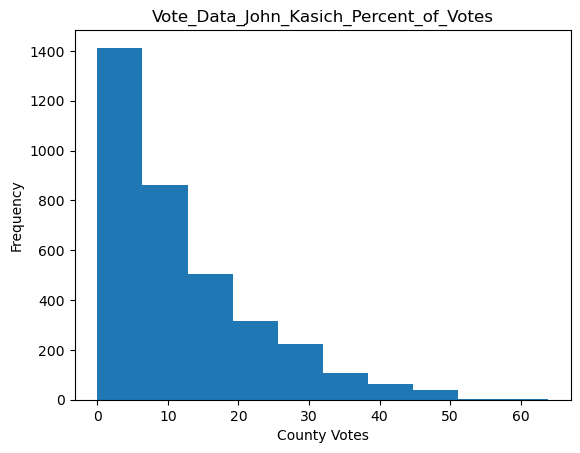

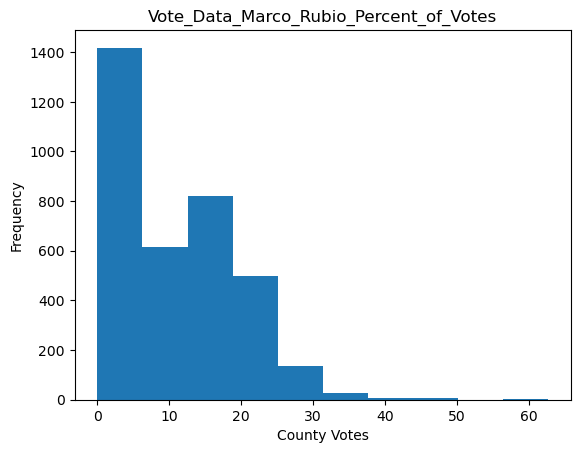

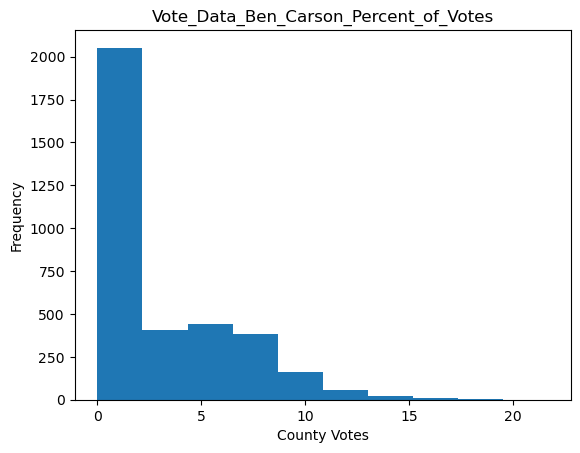

In [17]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.xlabel('County Votes')
    plt.ylabel('Frequency')
    plt.show()

### 5.4. Describing the relationship between each pair numerical variable in the dataframe. [1 pt]

For each pair of numerical variables in this dataframe, plot a scatterplot.

<function matplotlib.pyplot.show(close=None, block=None)>

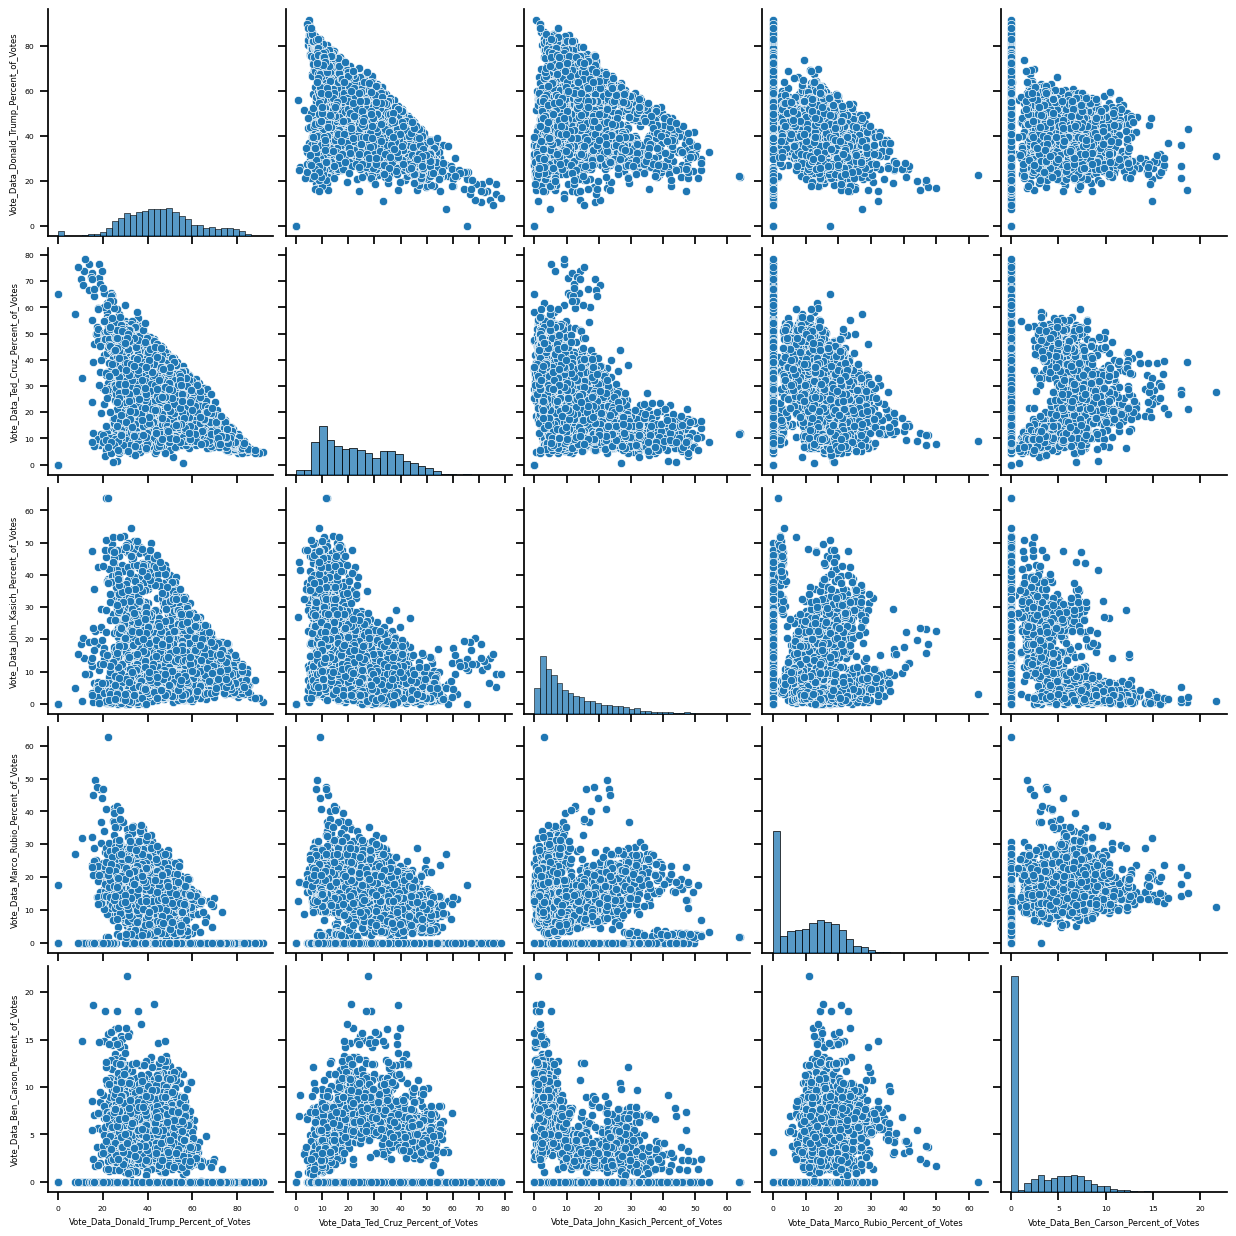

In [21]:
sns.set_context('notebook', font_scale = 0.5)
sns.pairplot(df)
plt.show

### 5.5. Dataset for clustering [0.5 pt]

Create a copy of this **df** dataframe and call it **X**.

In [24]:
X = df.copy()

X.head()

,Vote_Data_Donald_Trump_Percent_of_Votes,Vote_Data_Ted_Cruz_Percent_of_Votes,Vote_Data_John_Kasich_Percent_of_Votes,Vote_Data_Marco_Rubio_Percent_of_Votes,Vote_Data_Ben_Carson_Percent_of_Votes
0,36.9,23.9,4.3,20.2,8.3
1,57.9,9.9,14.2,12.7,2.5
2,44.5,38.2,3.4,10.6,0.0
3,47.9,15.9,4.9,20.9,9.5
4,28.2,8.7,32.5,24.9,2.3


### 5.6. Create an elbow plot for this dataframe X. [2 pt]

Create an k-means elbow plot for this dataframe X.
* Your elbow plot should consider clusterings with k=1, k=2, ..., k=19 clusters
* For each k, your elbow plot should find the average inertia of 3 trial clusterings

-.-.-.-.-
Clusterings with k=  1 Clusters
Average Inertia for K= 1  =  2284741.458829631
-.-.-.-.-
Clusterings with k=  2 Clusters
Average Inertia for K= 2  =  1475340.472069233
-.-.-.-.-
Clusterings with k=  3 Clusters
Average Inertia for K= 3  =  1062332.5670050338
-.-.-.-.-
Clusterings with k=  4 Clusters
Average Inertia for K= 4  =  860067.7136168111
-.-.-.-.-
Clusterings with k=  5 Clusters
Average Inertia for K= 5  =  725105.2364375318
-.-.-.-.-
Clusterings with k=  6 Clusters
Average Inertia for K= 6  =  626207.7735980368
-.-.-.-.-
Clusterings with k=  7 Clusters
Average Inertia for K= 7  =  541417.7285362657
-.-.-.-.-
Clusterings with k=  8 Clusters
Average Inertia for K= 8  =  461382.35426741955
-.-.-.-.-
Clusterings with k=  9 Clusters
Average Inertia for K= 9  =  415512.0417931171
-.-.-.-.-
Clusterings with k=  10 Clusters
Average Inertia for K= 10  =  377388.56647745473
-.-.-.-.-
Clusterings with k=  11 Clusters
Average Inertia for K= 11  =  343885.5965813415
-.-.-.-.-
Clus

Text(0.5, 1.0, 'Elbow Plot')

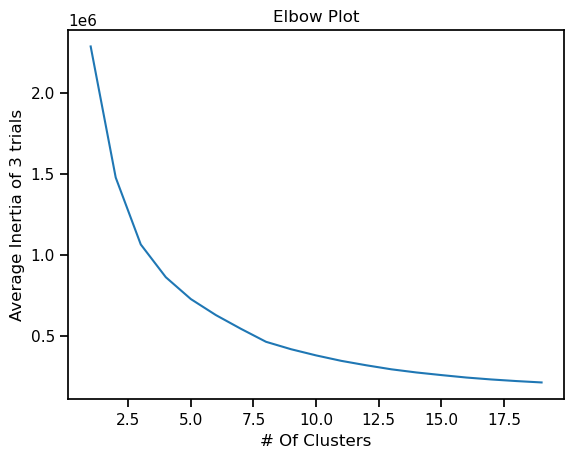

In [36]:
import warnings
warnings.filterwarnings('ignore')

inertia_list = []
for i in range(1,20):
    print('-.-.-.-.-')
    print('Clusterings with k=  '+str(i)+' Clusters')
    inertia_list2 = []
    for p in range(0,3):
        kmeans = KMeans(n_clusters=i).fit(X)
        inertia_list2.append(kmeans.inertia_)
    inertia_list.append(np.average(inertia_list2))
    print('Average Inertia for K= '+str(i)+'  =  '+str(np.average(inertia_list2)))

    
sns.set_context('notebook', font_scale = 1)
plt.plot(range(1,20), inertia_list)
plt.xlabel('# Of Clusters')
plt.ylabel('Average Inertia of 3 trials')
plt.title('Elbow Plot')

### 5.7. Does this elbow plot suggest that the dataset is *highly* clusterable with clusters that are able to be detected k-means? Explain. [1 pt]

There is no distinct elbow point. It is hard to consider that the data is highly clusterable

### 5.8. How many clusters does this elbow plot suggest we should use in k-means? Explain. [1 pt]
*Subjective: As long as your explain yourself and the logic is correct then you will get full credit.*

The elbow plot suggest either 3 or 5 clusters. A total of 5 cluster is the optimal number, given that changes in innertia after this number seem to have a more linear trend compared to changes observed when choosing a total of 3 clusters. Still as mentioned previously, the data itself is not clusterable

### 5.9. Cluster the data [2 pt]

Using the cluster number that you selected in question above, clusters the dataframe using k-means.

**<u>Note</u>: In sklearn, you can set a random seed for non-deterministic functions by using the random_state parameter. Within your KMeans() function in this problem, you should set an additional parameter with <u>random_state=100</u>.**

Save the cluster labels of your final clustering in a new column of the **df** dataframe called 'predicted_cluster'.



In [41]:
kmeans = KMeans(n_clusters = 5, random_state = 100).fit(X)
df['predicted_cluster'] = kmeans.labels_


### 5.10 Create side-by-side boxplots visualizations. [3 pt]

For each of the five candidates create a side-by-side boxplots visualization. Within each visualization, there should be a boxplot that corresponds to each predicted_cluster label.

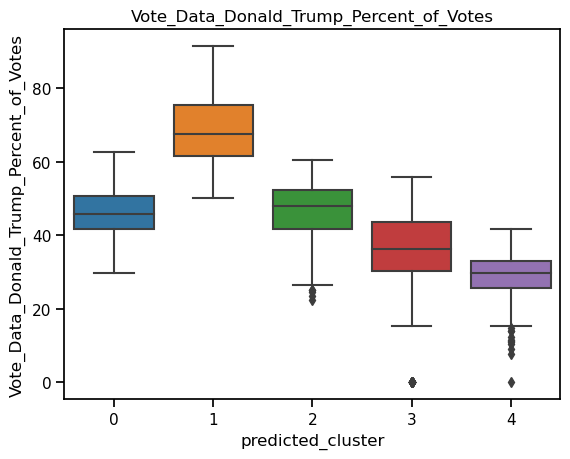

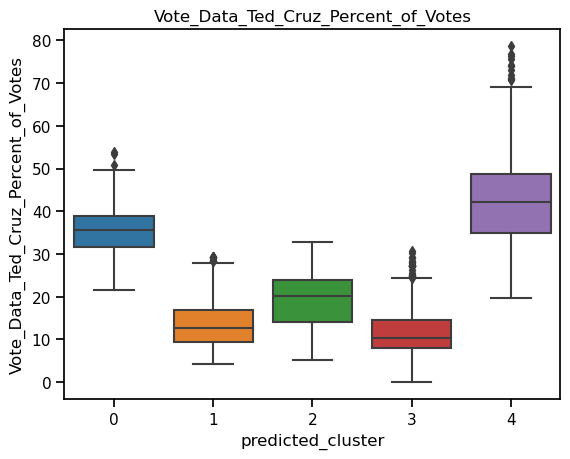

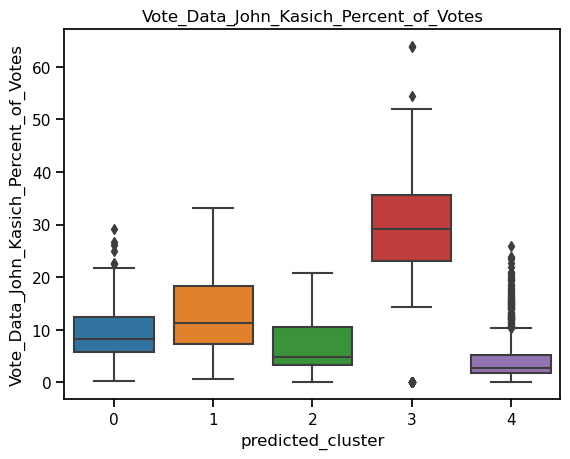

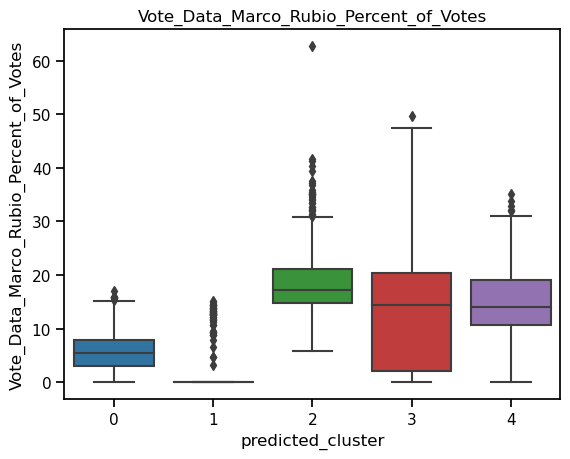

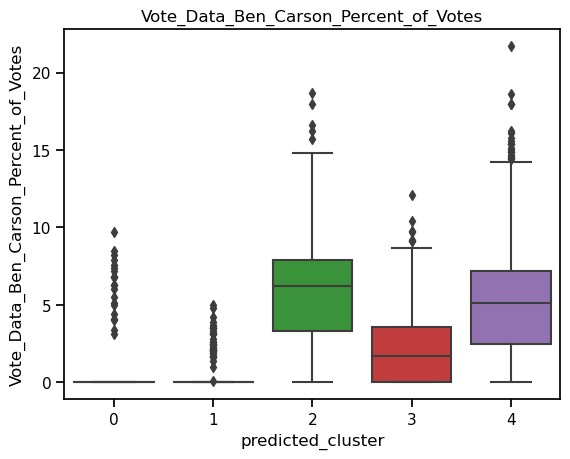

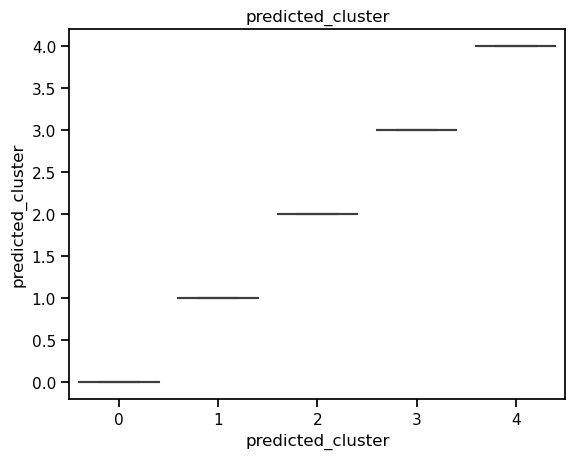

In [42]:
for i in df.columns:
    sns.boxplot(x = 'predicted_cluster', y = i, data = df)
    plt.title(i)
    plt.show()

### 5.11. Describing the clusters [2 pt]

Finally, let's describe what distinguishes these clusters. For each cluster answer the following questions.
* Did this cluster have the highest preference for a particular candidate(s) (compared to the other clusters)? If so, which candidate(s)?
- Cluster 1 & 5 have a higher preference for Ted Cruz (More 5 than 1)
- Cluster 2 has a higher preference for Donald Trump
- Cluster 3 has a higher preference for Ben Carson and Marco Rubio
- Cluster 4 has a higher preference for John Kasich
* Did this cluster have the lowest preference for a particular candidate(s) (compared to the other clusters)? If so, which candidate(s)?
- Cluster 1 has a lower preference for Ben Carson
- Cluster 2 has a lower preference for Marco Rubio and Ben Carson
- Cluster 4 has a lower preference for Ted Cruz
- Cluster 5 has a lower preference for John Kasich and Donald Trump